# Construindo um Modelo com Tensorflow - 🐶 🐱

**Problema:**  
Dada uma imagem, identificar se ela mostra um cachorro ou um gato.

Utilizaremos o dataset *Dogs vs. Cats* do Kaggle.  
O pipeline inclui:
- Pré-processamento e Data Augmentation dos dados.
- Construção e compilação de um modelo de deep learning com camadas convolucionais.
- Configuração de callbacks para monitoramento e prevenção de overfitting.


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fonte de Dados

Utilizaremos o dataset do Kaggle [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats/data)

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parâmetros de entrada
img_width, img_height = 150, 150
batch_size = 32

# Configuração do Data Augmentation e separação em treinamento e validação (80%-20%)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Gerador para o conjunto de treinamento
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/modelo2/dataset_treino',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Gerador para o conjunto de validação
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/modelo2/dataset_treino',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 802 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Construção do Modelo

O modelo utiliza três blocos de camadas convolucionais com Batch Normalization e MaxPooling, seguido de uma camada de flatten e duas camadas densas (com dropout para reduzir overfitting).  
A camada final utiliza a função de ativação **sigmoid** para a classificação binária.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definição do modelo
model = Sequential([
    InputLayer(input_shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Criação do otimizador com taxa de aprendizado menor
optimizer = Adam(learning_rate=1e-4)

# Compilação do modelo
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Criação do scheduler para reduzir a learning rate quando a validação não melhorar
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

## Callbacks

Utilizamos dois callbacks importantes:
- **EarlyStopping:** Interrompe o treinamento se não houver melhora no `val_loss` por 5 épocas consecutivas, restaurando os melhores pesos.
- **ModelCheckpoint:** Salva o modelo com a melhor performance na validação.

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('melhor_modelo.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    train_generator,
    steps_per_epoch=625,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,
    callbacks=callbacks_list
)

Epoch 1/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:07 313ms/step - accuracy: 0.6273 - loss: 0.6557

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6571 - loss: 0.6421 - val_accuracy: 0.5052 - val_loss: 4.7072
Epoch 2/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:09 317ms/step - accuracy: 0.7083 - loss: 0.5620

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6915 - loss: 0.6045 - val_accuracy: 0.5000 - val_loss: 4.1053
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6769 - loss: 0.5960 - val_accuracy: 0.5000 - val_loss: 5.0858
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6907 - loss: 0.5805 - val_accuracy: 0.5000 - val_loss: 5.2897
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6953 - loss: 0.5811 - val_accuracy: 0.4896 - val_loss: 5.9491
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6950 - loss: 0.5664 - val_accuracy: 0.4844 - val_loss: 5.1212
Epoch 7/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 2:43 273ms/step - accuracy: 0.7400 - loss: 0.5388

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7024 - loss: 0.5901 - val_accuracy: 0.5104 - val_loss: 3.7934
Epoch 8/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 2:53 289ms/step - accuracy: 0.7237 - loss: 0.5496

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7089 - loss: 0.5631 - val_accuracy: 0.5052 - val_loss: 3.7567
Epoch 9/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:18 331ms/step - accuracy: 0.7133 - loss: 0.5468

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7180 - loss: 0.5513 - val_accuracy: 0.5104 - val_loss: 2.8604
Epoch 10/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:02 305ms/step - accuracy: 0.7172 - loss: 0.5573

625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7217 - loss: 0.5566 - val_accuracy: 0.5052 - val_loss: 2.8256
Epoch 11/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 2:53 289ms/step - accuracy: 0.7284 - loss: 0.5559

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7091 - loss: 0.5702 - val_accuracy: 0.5469 - val_loss: 2.1678
Epoch 12/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:20 334ms/step - accuracy: 0.6802 - loss: 0.5982

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.6963 - loss: 0.5962 - val_accuracy: 0.5365 - val_loss: 1.7984
Epoch 13/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 2:53 290ms/step - accuracy: 0.7400 - loss: 0.5540

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7406 - loss: 0.5525 - val_accuracy: 0.5990 - val_loss: 1.3229
Epoch 14/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 2:48 281ms/step - accuracy: 0.7324 - loss: 0.5463

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7212 - loss: 0.5539 - val_accuracy: 0.5625 - val_loss: 1.1717
Epoch 15/15
 26/625 ━━━━━━━━━━━━━━━━━━━━ 3:09 317ms/step - accuracy: 0.7322 - loss: 0.5670

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7164 - loss: 0.5632 - val_accuracy: 0.6302 - val_loss: 0.7504


## Análise dos Resultados

Após o treinamento, é importante visualizar os gráficos de _loss_ e _accuracy_ para o conjunto de treinamento e validação. Dessa forma, você pode identificar problemas como overfitting e ajustar os hiperparâmetros, se necessário.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import confusion_matrix

# ---------------------------
# Plot do Loss durante o Treinamento
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ---------------------------
# Plot da Accuracy durante o Treinamento
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---------------------------
# Geração da Matriz de Confusão para o conjunto de validação

# Importante: para garantir a ordem correta (e que as classes se mantenham alinhadas com 'validation_generator.classes'),
# definimos o parâmetro shuffle como False:
validation_generator.shuffle = False

# Calcular o número de steps (garantindo que todos os dados sejam avaliados)
val_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

# Resetar o generator para começar do início
validation_generator.reset()

# Obter as previsões do modelo para todo o conjunto de validação
y_pred = model.predict(validation_generator, steps=val_steps, verbose=1)
# Converter as previsões para classes: 1 se > 0.5, caso contrário 0
y_pred_class = (y_pred > 0.5).astype("int32")

# Obter os rótulos verdadeiros
y_true = validation_generator.classes

# Ajuste para garantir que o número de previsões corresponde ao número de amostras reais
y_pred_class = y_pred_class[:len(y_true)]

# Calcular a Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_class)

# Plotar a Matriz de Confusão
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
class_names = list(validation_generator.class_indices.keys())
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.

# Inserir os valores nas células da matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class Indices: {'cats': 0, 'dogs': 1}
Previsão: Gato
Acurácia: 94.09 %.


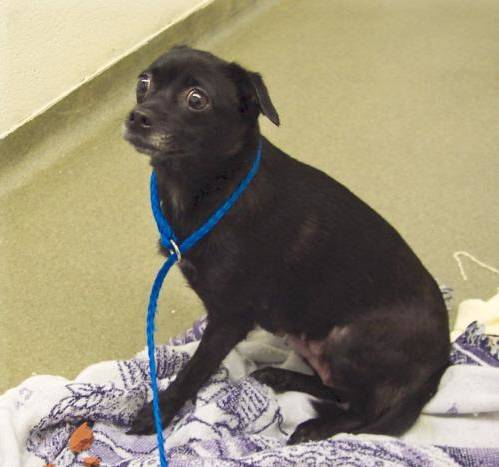

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display

# Carrega a imagem de teste com o tamanho esperado pelo modelo (ajuste conforme seu input, aqui usamos 150x150)
test_image = image.load_img('/content/drive/MyDrive/modelo2/dataset_teste/98.jpg', target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normaliza a imagem

# Faz a previsão usando o modelo já treinado
result = model.predict(test_image)

# Obtém o mapeamento das classes do gerador de treinamento
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Interpreta o resultado (a saída do modelo é uma probabilidade entre 0 e 1)
if result[0][0] >= 0.5:
    prediction = 'Cachorro'
    accuracy = round(result[0][0] * 100, 2)
else:
    prediction = 'Gato'
    accuracy = round((1 - result[0][0]) * 100, 2)

# Exibe a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibe a imagem de teste
display(Image(filename='/content/drive/MyDrive/modelo2/dataset_teste/98.jpg'))
